
<strong>Université Chouaïb Doukkali<br>Faculté des Sciences d’El Jadida <br>    Département d’Informatique<br></strong><br><img src="fs.png"  height="110" width="110"><br><br><div align="center"> <h1>Implementation of graph theory algorithms from scratch using python</h1></div><br><br><br><div align="left"><strong>Realized by: AGHEZZAF Mohamed</strong></div>  <div align="right"><strong> Framed by: Pr. Ahmed AZOUAOUI</strong></div><br><br><div align="center"><strong>Module: GRAPH THEORY</strong></div><br><div align="center">College year : 2018-2019</div><br><br><br><br>

In [27]:
import pydot
from IPython.display import Image, display

# Creating a graph

In [28]:
#List of summits
G = dict()
#Get the graph size 
taille = input("Give the size of the graph: ")
#Retrieve the type of graph
print("Give the type of graph: (type 1 if the graph is oriented, 0 otherwise)")
genre = input()

for i in range(int(taille)):
    a=input("Give the initial end of the arc/edge ")
    b=input("Give the final end of the arc/edge \n")
    if(a not in G):
        G[a]=[]
    G[a].append(b)
    
def Sommets(G):
    S=set()
    for i in G:
        S.add(i)
        for j in G[i]:
            S.add(j)
    return sorted(S)

def Arcs(G):
    A=set()
    for i in G:
        for j in G[i]:
            A.add(i+j)
    return sorted(A)
Sommets(G)
Arcs(G)

Give the size of the graph: 4
Give the type of graph: (type 1 if the graph is oriented, 0 otherwise)
0
Give the initial end of the arc/edge A
Give the final end of the arc/edge 
B
Give the initial end of the arc/edge B
Give the final end of the arc/edge 
C
Give the initial end of the arc/edge C
Give the final end of the arc/edge 
D
Give the initial end of the arc/edge D
Give the final end of the arc/edge 
B


['AB', 'BC', 'CD', 'DB']

# Display of a graph

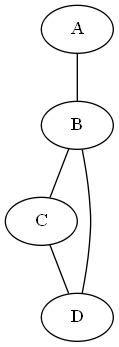

In [29]:
def TraceG(G,genre):
    if(genre=="0"):
        graph=pydot.Dot(graph_type="graph")

    elif genre=="1":
        graph=pydot.Dot(graph_type="digraph")
    for i in G:    
        node=pydot.Node(i)
        graph.add_node(node)
        for j in G[i]:
            arc=pydot.Edge(i,j)
            graph.add_edge(arc)
    img=Image(graph.create_png())
    display(img)

TraceG(G,genre)

# Summit predecessor and successor

In [30]:
#The set of vertex predecessors x
def Pred(G,sommet,genre):
    list=[]
    if(genre=="1"):
        for i in G:    
            for j in G[i]:
                if (j==sommet):
                    list.append(i)

        if(not list):
            return None
        else:
            return list
    
    if(genre=="0"):
        for i in G:    
            for j in G[i]:
                if (j==sommet):
                    list.append(i)
        for i in G:
            if(i==sommet):
                for j in G[i]:
                    list.append(j)
        if(not list):
            return None
        else:
            return list
            
#The set of successors of vertex x
def Succ(G,sommet,genre):
    list=[]
    
    if(genre=="1"):
        for i in G:
            if (i==sommet):
                for j in G[i]:
                    list.append(j)             
        if(not list):
            return None
        else:
            return list
    
    if(genre=="0"):
        for i in G:
            if(i==sommet):
                for j in G[i]:
                    list.append(j)
        for i in G:    
            for j in G[i]:
                if (j==sommet):
                    list.append(i)        
        if(not list):
            return None
        else:
            return list

sommet=input("Give a vertex ")
print("Pred(",sommet,") = ",Pred(G,sommet,genre))
print("Succ(",sommet,") = ",Succ(G,sommet,genre))

Give a vertex B
Pred( B ) =  ['A', 'D', 'C']
Succ( B ) =  ['C', 'A', 'D']


# Neighborhood of a summit

In [31]:
def Voisinage(G,sommet):
    voisinages=[]
    pre=Pred(G,sommet,genre)
    suc=Succ(G,sommet,genre)
    for s in pre:
        voisinages.append(s)
    for s in suc:
        if(s not in voisinages):
            voisinages.append(s)
    return(voisinages)

sommet = input("Give a vertex ")
print(Voisinage(G,sommet))

Give a vertex B
['A', 'D', 'C']


# Degree of a vertex

In [32]:
#The outer half degree of the vertex x
def DDE(G,sommet):
    d = 0
    for i in G:
        if(i==sommet):
            d = len(G[i])
    return d

#The interior half degree of the vertex x
def DDI(G,sommet):
    d = 0
    for i in G:    
        for j in G[i]:
            if(j==sommet):
                d+=1;
    return d

#The degree of the vertex x   
def D(G,sommet):
    d = 0
    d = DDE(G,sommet)+DDI(G,sommet)
    return d

sommet = input("Give a vertex ")
if(genre==1):
    print("dG+("+sommet+") = ",DDE(G,sommet))    
    print("dG-("+sommet+") = ",DDI(G,sommet))
d=D(G,sommet)
print("dG("+sommet+") = ",d)
if(d==0):
    print("The vertex \""+sommet+"\" is isolated")
if(d==1):
    print("The vertex \""+sommet+"\" is isolated")

Give a vertex B
dG(B) =  3


# Adjacency matrix
* The adjacency matrix of a graph G is an n x n square matrix, each row and each column of which corresponds to a vertex.

In [33]:
def MAdjacence(G,genre):
    sommets = Sommets(G)
    Ma = []
    if(genre=="0"):
        for x in sommets:
            L = []
            for y in sommets:
                if ((x in G.keys()) and (y in G[x])):
                    L.append(1)
                elif ((y in G.keys()) and (x in G[y])):
                    L.append(1)
                else:
                    L.append(0)
            Ma.append(L)
        return Ma
    elif genre=="1":
        for x in sommets:
            L = []
            for y in sommets:
                if ((x in G.keys()) and (y in G[x])):
                    L.append(1)
                else:
                    L.append(0)
            Ma.append(L)
        return Ma

Ma=MAdjacence(G,genre)
print("Adjacency matrix: ",Ma)

Adjacency matrix:  [[0, 1, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 0]]


# Incidence matrix
* The incidence matrix of a graph is an n x m matrix in which each row corresponds to a vertex and each column to an arc.

In [34]:
def MIncidence(G,genre):
    nb = 0
    Mi = []
    arcs = Arcs(G)
    sommets = Sommets(G)
    if(genre=="0"):
        for s in sommets:
            L = []
            for a in arcs:
                if (s in a):
                    L.append(1)
                else:
                    L.append(0)
            Mi.append(L)
        return Mi
    elif genre=="1":
        for s in sommets:
            L = []
            for a in arcs:
                if (s in a[0]):
                    L.append(1)
                else:
                    L.append(0)
            Mi.append(L)
        return Mi

MI=MIncidence(G,genre)
print("Incidence matrix: ",MI)

Incidence matrix:  [[1, 0, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0], [0, 0, 1, 1]]


# Simple graph
* A graph is simple if it has no loops and no parallel arcs (resp. Edges).

In [35]:
def Simple(G):
    b = True
    for i in G:
        for j in G[i]:
            if (j in G):
                if (( i in G[j]) or (i==j )):
                    b = False
    if not(b):
        print("The graph G is not simple")
    else:
        print("The graph G is simple")
        
Simple(G)

The graph G is simple


# Complete graph
* A complete graph is a graph where each vertex is connected to all the others

In [36]:
def Complet(G):
    b = True
    sommets = Sommets(G)
    Ma = MAdjacence(G,genre)
    for i in range(len(sommets)):
        nb = 0
        for j in range(len(sommets)):
            if(( Ma[i][j]==1) and (i!=j)) :
                nb+=1
        if(nb < (len(sommets)-1)):
            b = False
    if(not(b)):
        print("The graph G is not complete")
    else:
        print("The graph G is complete")

Complet(G)

The graph G is not complete


# Add or remove a vertex

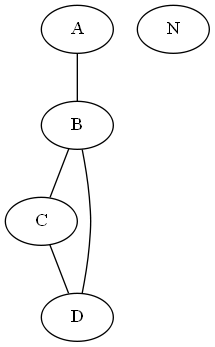

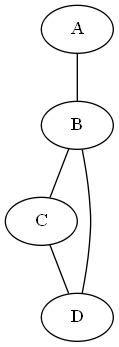

In [37]:
def AjouteS(G,sommet):
    if sommet not in G.keys():
        G[sommet] = []
    else:
        print("Summit already exists")

def SupprimeS(G,sommet):
    if sommet in G.keys():
        del(G[sommet])
    else:
        print("This summit does not exist")

AjouteS(G,"N")
TraceG(G,genre)
SupprimeS(G,"N")
TraceG(G,genre)

# Add or remove an arc / edge


The arc/edge does not exist


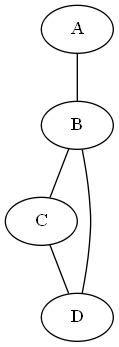

The arc/edge does not exist


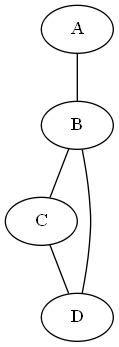

In [38]:
def AjouteA(G,eI,eF):
    sommets = Sommets(G)
    if((eI in sommets) and (eF in sommets)):
        if(eI in G.keys()):
            G[eI].append(eF)
        else:
            G[eI] = []
            G[eI].append(eF)
    else:
        print("The arc/edge does not exist")

def SupprimeA(G,eI,eF):
    sommets = Sommets(G)
    if((eI in sommets) and (eF in sommets)):
        G[eI].remove(eF)
    else:
        print("The arc/edge does not exist")

AjouteA(G,"a","c")
TraceG(G,genre)
SupprimeA(G,"a","c")
TraceG(G,genre)

# Related graph
* From a graph G of n vertices and of adjacency matrix X, is connected if and only if the matrix Y does not contain a zero non-diagonal term.
Y = X+X^2+X^3+…+X^(n-1)

In [39]:
def Multi(m1, m2):
    Mm = []
    for i in range(len(m1)):
        ligne = []
        for j in range(len(m1)):
            element = 0
            for k in range(len(m1)):
                if ( (element==1) or (m1[i][k] * m2[k][j]==1) ):
                    element = 1
                else:
                    element = 0
            ligne.append(element)
        Mm.append(ligne) 
    return Mm

def Som(m1, m2):
    Sm = []
    for i in range(len(m1)):
        ligne = []
        for j in range(len(m1)):
            if((m1[i][j]==1) or (m2[i][j]==1) ):
                element = 1
            else:
                element = 0
            ligne.append(element)
        Sm.append(ligne)
    return Sm

def Connexe(Ma):
    n = len(Ma)
    Y = Ma
    m = Ma
    for x in range(n-2):
        m = Multi(m,Ma)
        Y = Som(Y,m)
    return Y

Ma = MAdjacence(G,genre)
Y = Connexe(Ma)
connexe = True
for i in range(len(Y)):
    for j in range(len(Y)):
        if((i!=j) and (Y[i][j]==0)):
            connexe = False
            break
if connexe:
    print("Le graphe G est connexe")
else:
    print("The graph G is not connected")

Le graphe G est connexe


# Euler graph
* The graph G is an Eulerian graph if and only if it admits an Eulerian cycle.
* A cycle is a closed chain (does not have the same edge twice).
* A chain is said to be Eulerian if it is simple and passes through all the edges of the graph.
* A connected graph G admits an Eulerian cycle if and only if all its vertices are of even degree.

In [40]:
def Euler(G):
    euler = True
    Ma = MAdjacence(G,genre)
    Y = Connexe(Ma)
    connexe = True
    for i in range(len(Y)):
        for j in range(len(Y)):
            if((i!=j) and (Y[i][j]==0)):
                connexe = False
                break 
    sommets=Sommets(G)
    if(connexe):
        for s in sommets:
            if(D(G,s)%2!=0):
                euler = False
                break
        if(euler):
            print("The graph G is Eulerian")
        else:
            print("The graph G is not Eulerian")
    else:
        print("The graph G is not Eulerian")

Euler(G)

The graph G is not Eulerian


# Strongly related
* A directed graph is said to be strongly connected if its vertices are all accessible to each other, i.e., for any pair of vertices u and v there exists a path from u to v and also a path from v to u.

In [41]:
def FortementConexee(G):
    sommets = Sommets(G)
    plus,moins = [],[]
    done = False
    nbFC = 0
    while(done==False):
        plus.append(sommets[0])
        moins.append(sommets[0])
        for s in plus:
            succs = Succ(G,s,genre) 
            for ss in succs:
                if(ss not in plus):
                    plus.append(ss)
        for s in moins:
            preds = Pred(G,s,genre) 
            for ps in preds:
                if(ps not in moins):
                    moins.append(ps)
        plus,moins = set(plus),set(moins)
        fc = plus.intersection(moins)
        nbFC+=1       
        if(len(fc)!=len(sommets)):
            sommets = list(set(sommets)-fc)
            plus,moins=[],[]
        else:
            done = True
    if(nbFC==1):
        print("The graph G is strongly connected")
    else:
        print("The graph G is not strongly connected")

FortementConexee(G)

The graph G is strongly connected


# Existence of a cycle

In [42]:
def Cycle(G):
    sommets = Sommets(G)
    path = []
    for sommet in sommets:
        for vs in Voisinage(G,sommet):
            if(vs not in path[-1:]):
                path.append(vs)
                if(vs in path):
                    return True
        path = []
    return False
            
cycle = Cycle(G)
if(cycle):
    print("The graph G contains a cycle")
else:
    print("The graph G contains no cycle")

The graph G contains a cycle


# Welsh and Powell algorithm
* Graph coloring consists of assigning a color to each of its vertices so that two vertices connected by an edge are of different color.

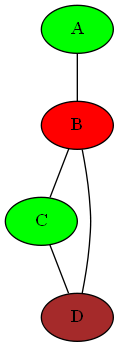

In [43]:
def WelshPowell(G):
    #Color chart
    couleurs = ["blue","green","red","brown","gray","pink"]
    Ma = MAdjacence(G,genre)
    sommets = Sommets(G)
    degres,result = [],[]
    nb = 0
    for sommet in sommets:
        degres.append(len(Voisinage(G,sommet)))
        result.append(0)
    degres.sort()
    for i in range(len(degres)):
        if(result[i]==0):
            nb+=1
            result[i] = couleurs[nb]
            for j in range(len(degres)): 
                if(Ma[i][j]==0 and result[j]==0):
                    for k in range(len(degres)):
                        passe = 0
                        if(Ma[j][k]==1 and result[k]==result[i]):
                            passe = 1
                            break
                    if(passe==0):
                        result[j] = result[i]
    d,i = {},0
    for sommet in sommets:
        d[sommet] = result[i]
        i+=1
    #Graphical representation of our graph after applying the algorithm
    graph=pydot.Dot(graph_type="graph")
    for i in sommets:    
        node = pydot.Node(i,style="filled",fillcolor=d[i])
        graph.add_node(node)
    for i in G: 
        for j in G[i]:
            arc = pydot.Edge(i,j)
            graph.add_edge(arc)
    img = Image(graph.create_png())
    display(img)

WelshPowell(G)

# Trees

In [44]:
def Ajpoids(G):
    sommets = Sommets(G)
    M = MAdjacence(G,genre)
    ar = Arcs(G)
    arcs = {}
    for i in range(len(ar)):
        arcs[ar[i]] = int(input("Give the weight of the bow "+ar[i]+" "))
    return(arcs)

arcs=Ajpoids(G)

Give the weight of the bow AB 4
Give the weight of the bow BC 1
Give the weight of the bow CD 5
Give the weight of the bow DB 2


# Tree trace

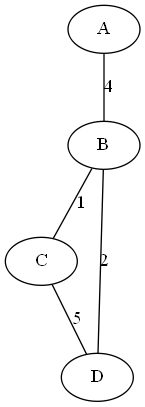

In [45]:
def TraceA(G):
    graph = pydot.Dot(graph_type="graph")
    for i in G:    
        node = pydot.Node(i)
        graph.add_node(node)
        for j in G[i]:
            arc = i+j
            arc = pydot.Edge(i,j,label=arcs[arc])
            graph.add_edge(arc)
    img = Image(graph.create_png())
    display(img)

TraceA(G)

# Kruskal's algorithm
* The algorithm builds a minimum spanning tree by selecting edges by increasing weight.
* A spanning tree is a connected subgraph without a cycle that contains all the vertices of the graph.

The tree size covering minimum weight is:  14


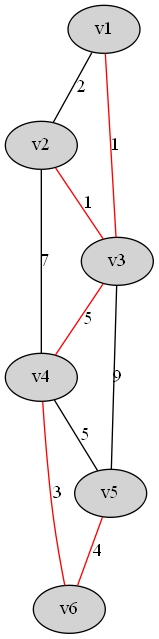

In [46]:
def kruskal(G,sommets):
    T = [[0 for i in range(len(G))] for j in range(len(G))]
    n = 0
    d = {}
    path = []
    bol = False
    taille = 0
    for i in range(len(G)):
        for j in range(len(G)):
            if(G[i][j]!=0):
                arc = (i,j)
                #Create a dictionary that contains each edge is its weight
                d[arc] = G[i][j]
    #Sort edges by weight
    A = sorted(d.items(), key=lambda kv: kv[1])

    for i in A:
        #Calculate Y = X+X^2+X^3+…+X^(n-1)
        Y = Connexe(T)
        source,cible = i[0][0],i[0][1]
        #If there is no path between source and target add the edge to path
        if(Y[source][cible]!=1) and (Y[cible][source]!=1):
            T[cible][source],T[source][cible] = 1,1
            path.append(i)
            n+=1
        #The algorithm stops when the number of edges of T is equal to N-1.
        if(n==len(G)-1):
            break
    #Graphical representation of our graph after applying the algorithm
    graph = pydot.Dot(graph_type="graph")
    for i in range(len(sommets)):
        node = pydot.Node(sommets[i],style="filled")
        graph.add_node(node)
        
    for i in range(len(G)):
        for j in range(len(G)):    
            if(G[i][j]!=0):
                for p in path:
                    if((p[0][0]==j and p[0][1]==i) or (p[0][0]==i and p[0][1]==j)):
                        bol = True
                        break
                if(not(bol)):
                    arc = pydot.Edge(sommets[i],sommets[j],label=G[i][j])
                    graph.add_edge(arc)
            bol = False
    for p in path:
        arc = pydot.Edge(sommets[p[0][0]],sommets[p[0][1]],label=p[1],color="red")
        graph.add_edge(arc)
        taille+=p[1]
    print("The tree size covering minimum weight is: ",taille)
    img = Image(graph.create_png())
    display(img)

sommets={0:'v1',1:'v2',2:'v3',3:'v4',4:'v5',5:'v6'}
G=[[0, 2, 1, 0, 0, 0],
   [0, 0, 1, 7, 0, 0],
   [0, 0, 0, 5, 9, 0],
   [0, 0, 0, 0, 5, 3],
   [0, 0, 0, 0, 0, 4],
   [0, 0, 0, 0, 0, 0]]
kruskal(G,sommets)

# Prim's algorithm
* The algorithm consists in making a tree grow from a vertex. We start with a single vertex then at each step, we add an edge of minimum weight having exactly one end in the tree under construction. Indeed, if its two ends already belonged to the tree, the addition of this edge would create a second path between the two vertices in the tree under construction and the result would contain a cycle.

The size of the tree covering minimum weight is:  13


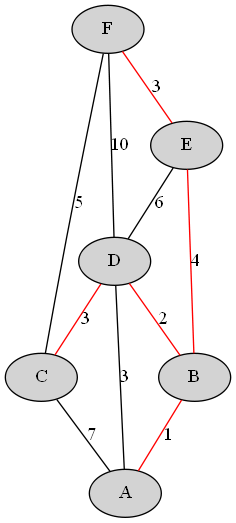

In [47]:
def Prim(G,sommets):
    Path,plusProche,distanceMin = [],[],[]
    n = len(G)
    taille = 0
    
    #Initialize Nearest and Min distance with zeros
    for i in range(0,n):
        plusProche.append(0)
        distanceMin.append(0)
    
    #Remotely assign Mine the weights of the source neighborhoods
    for i in range(1,n):
        distanceMin[i] = G[i][0]
    
    for i in range(0,n-1):
        Min = 0
        #Edge condition if all vertices are processed
        if(len(Path)+1==len(sommets)):
            break
        
        for j in range(1,n):
            #Assign index the top index that is close to current top
            if(( 0 < distanceMin[j] < Min) or (not Min and 0 <= distanceMin[j])):
                Min = distanceMin[j]
                indice = j
        #Assign the index of the closest to the current vertex to the "Path" dictionary
        Path.append((indice, plusProche[indice]))
        #Assign -1 to all vertices already processed
        distanceMin[indice] = -1
        distanceMin[plusProche[indice]] = -1
        
        for j in range(1,n):
            #Assign remotely Mine the weights of the neighborhoods of current vertex "index"
            if (( 0 < G[indice][j] < distanceMin[j]) or (not distanceMin[j])):
                distanceMin[j] = G[indice][j]
                distanceMin[indice] = G[indice][j]
                plusProche[j] = indice
                plusProche[indice] = j

    #Graphical representation of our graph after applying the algorithm
    graph=pydot.Dot(graph_type="graph")
    
    for i in range(len(sommets)):
        node=pydot.Node(sommets[i],style="filled")
        graph.add_node(node)

    for i in range(len(G)):
        for j in range(len(G)):
            if(i==j):
                break
            if(G[i][j]!=0):
                for p in Path:
                    if(p[0]==i and p[1]==j):
                        bol=True
                    elif(p[0]==j and p[1]==i):
                        bol=True
                if(bol==True):
                    arc=pydot.Edge(sommets[i],sommets[j],label=G[i][j],color="red")
                    taille+=G[i][j]
                    bol=False
                else:
                    arc=pydot.Edge(sommets[i],sommets[j],label=G[i][j])
                graph.add_edge(arc)
    print("The size of the tree covering minimum weight is: ",taille)
    img=Image(graph.create_png())
    display(img)

sommets={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F'} 
G = [[0, 1, 7, 3, 0, 0],
     [1, 0, 0, 2, 4, 0],
     [7, 0, 0, 3, 0, 5],
     [3, 2, 3, 0, 6,10],
     [0, 4, 0, 6, 0, 3],
     [0, 0, 5,10, 3, 0]]
 
Prim(G,sommets)

# Shortest paths in a graph
## Dijkstra's algorithm
* At the start, we consider that the distances from each vertex to the starting vertex are infinite, except for the starting vertex for which the distance is zero. The starting subgraph is the empty set.
* During each iteration, we choose outside the subgraph a vertex of minimum distance and we add it to the subgraph. Then, we update the distances of the neighboring vertices of the added one. The update works as follows: the new distance from the neighboring vertex is the minimum between the existing distance and that obtained by adding the weight of the arc between neighboring vertex and vertex added to the distance from the added vertex.
* Continue in this way until the summits are exhausted (or until the arrival summit is selected).

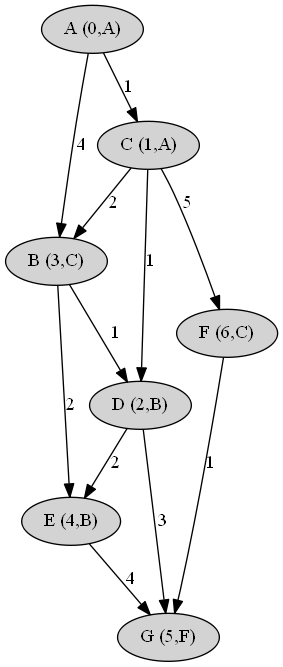

In [48]:
def Dijkstra(G):
    sommets = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'}
    V = [0,1,2,3,4,5,6]
    T,bol = set(),False
    tab,trace,d,path,voisinages = [],[],{},{},{}
    #Neighborhoods contains each vertex with these successors
    for i in range(len(G)):
        for j in range(len(G[i])):
            if(G[i][j]!=0):
                tab.append(V[j])
        voisinages[V[i]] = tab
        tab = [] 
    V = set(V)
    #Initialize d(i) = 999 for all vertices i
    for v in range(len(V)):
        d[v] = 999
    #Initialize d(s) = 0
    d[0] = 0
    #Edge condition if all vertices are processed
    while(T!=V):
        #Sort array d by weight
        v = sorted(d.items(), key=lambda kv: kv[1])
        for i in v:
            if(i[0] not in T) :
                T.add(i[0])
                break
        for voisinage in voisinages[i[0]]:
            d[voisinage] = min(d[voisinage],d[i[0]]+G[i[0]][voisinage])
            path[voisinage] = i[0]
    #Graphical representation of our graph after applying the algorithm
    graph = pydot.Dot(graph_type="digraph")
    path[0] = 0
    for i in range(len(V)):
        node = pydot.Node(str(sommets[i])+" ("+str(d[i])+","+str(sommets[path[i]])+")",style="filled")
        graph.add_node(node)
        
    for i in range(len(V)):
        for j in range(len(V)):    
            if(G[i][j]!=0):
                arc = pydot.Edge(str(sommets[i])+" ("+str(d[i])+","+str(sommets[path[i]])+")",str(sommets[j])+" ("+str(d[j])+","+str(sommets[path[j]])+")",label=G[i][j])
                graph.add_edge(arc)
    img = Image(graph.create_png())
    display(img)

G= [[0, 4, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 2, 0, 0],
    [0, 2, 0, 1, 0, 5, 0],
    [0, 0, 0, 0, 2, 0, 3],
    [0, 0, 0, 0, 0, 0, 4],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0]]

Dijkstra(G)

## Bellman-Ford algorithm
* The contribution of this algorithm to that of Dijkstra is the possibility of having negative weights between vertices.
* Like Dijkstra's algorithm, the first step is to initialize the costs to infinity and set the starting vertex to 0. Subsequently, the Bellman-Ford algorithm updates the costs for each vertex (therefore checks for each edge) and this, as many times as the number of vertices of the graph minus one. This has the effect of stabilizing the cost of all paths unless there is a negative weight cycle.
* This algorithm is an improvement of Dijkstra since it accepts negative weights. However, it requires a longer execution time.

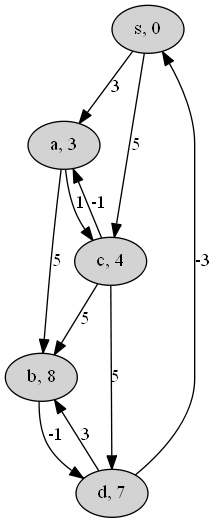

In [49]:
def BellmanFord(G,sommets,s):
    Y = {}
    arcs = []
    n = len(G)
    #Initialize y(i) = 999 for all vertices i
    for i in range(n):
        Y[i] = [999,0]
    #Initialiser y(s) = 0
    Y[s][0] = 0

    #Fill arcs with all graph arcs
    for i in range(n):
        for j in range(n):
            if(G[i][j]!=0):
                arcs.append((i,j))
    #Edge condition if (n-1) iterations or there is more Relaxation
    for k in range(n-1):
        for arc in arcs:
            #Relacher (a,b, c(a,b))
            a,b,c = Y[arc[1]][0],Y[arc[0]][0],G[arc[0]][arc[1]]
            if(a>b+c):
                Y[arc[1]][0]=b+c
                Y[arc[1]][1]=arc[0]
                
    #Graphical representation of our graph after applying the algorithm 
    graph=pydot.Dot(graph_type="digraph")
    for i in range(n):
        node = pydot.Node(str(sommets[i])+", "+str(Y[i][0]),style="filled")
        graph.add_node(node)
        
    for i in range(n):
        for j in range(n):    
            if(G[i][j]!=0):
                arc = pydot.Edge(str(sommets[i])+", "+str(Y[i][0]),str(sommets[j])+", "+str(Y[j][0]),label=G[i][j])
                graph.add_edge(arc)
    img = Image(graph.create_png())
    display(img)
    
sommets = {0:'s',1:'a',2:'b',3:'c',4:'d'}
G= [[0, 3, 0, 5, 0],
   [0, 0, 5, 1, 0],
   [0, 0, 0, 0,-1],
   [0,-1, 5, 0, 5],
   [-3, 0, 3, 0, 0]]   
source = 0
BellmanFord(G,sommets,source)